# The Test Problem
## Problem:
We have a test that consists of $n$ questions. We have to draw three of them and answer correctly at least one of them to pass the test. We are prepared only for $m$ out of $n$ questions, such that $m \leq n$. What is the probability that we will draw at least one known question? 

## Note:
It is important to emphasize that every drawn question can be regarded as a dependent random event since after randomly selecting a question we reduce the number of outstanding questions for the second draft.

## Solution:
Let $\Omega$ denote a sample space, then

\begin{equation}
\Omega = \{(\omega_1, \omega_{2|1}, \omega_{3|1,2})\},
\end{equation}
where each element of a random vector is a random event representing a question drawn from a set of all questions conditional on the previous draws. 

It can be partitioned into four events:
1) $B_0$ -- we are unlucky to draw any known question,
2) $B_1$ -- we draw only one known question,
3) $B_2$ -- we draw exactly two known questions,
4) $B_3$ -- all drawn questions are known.
The total sum of the partition must always be equal to the identity, therefore it can be used as a check.

We are interested in the event $C \subseteq \Omega$, when we draw at least one known question. It is obvious, that

\begin{equation}
C = \sum_{n=1}^{3} P(B_n).
\end{equation}

In order to calculate $P(B_n)$ we are going to use the following property,

\begin{equation}
P(X \cap Y \cap Z) = P(Z)P(Y|Z)P(X|Y \cap Z).
\end{equation}

For example, the probability that we draw only one known question can be obtained by 

\begin{align*}
P(B_1) &= P(1,0,0) + P(0,1,0) + P(0,0,1) \\
       &= P(1)P(0|1)P(0|1,0) + P(0)P(1|0)P(0|0,1) + P(0)P(0|0)P(1|0,0).
\end{align*}

The solution in Python with visualization is presented below.

In [4]:
#Defining the probability function
def prob_pass(n = 45, m = 5, known = 1):
    q = n - m

    prob_1 = m/n*q/(n-1)*(q-2)/(n-2) + q/n*m/(n-1)*(q-1)/(n-2) + q/n*(q-1)/(n-1)*m/(n-2)
    prob_2 = m/n*(m-1)/(n-1)*q/(n-2) + q/n*m/(n-1)*(m-1)/(n-2) + m/n*q/(n-1)*(m-1)/(n-2)
    prob_3 = m/n*(m-1)/(n-1)*(m-2)/(n-2)
    
    if known == 1:
        return prob_1 + prob_2 + prob_3
    if known == 2:
        return prob_2 + prob_3
    if known == 3:
        return prob_3

The plot of the function is presented below. As we see, the probability naturally increases as the number of prepared questions increases. Surprisingly, it is enough to learn less than half of the questions to draw at least one known question with the probability of $50\%$. Another interesting observation that can be made is that it is enough to prepare $50\%$ of the questions for the test to have a $50\%$ chance to draw two known questions.

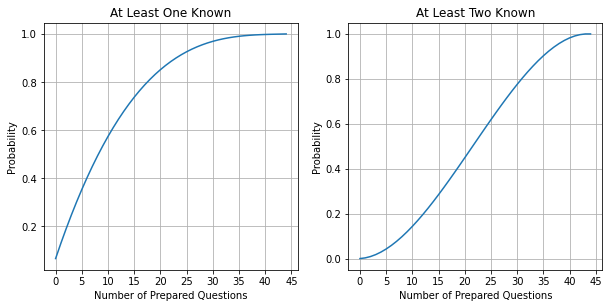

In [3]:
#Loading libraries
import matplotlib.pyplot as plt

#creating a list of probabilities
l1 = [prob_pass(m = i) for i in range(1,46)]
l2 = [prob_pass(m = i, known =2) for i in range(1,46)]

#plotting the probability mass function for two cases
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)

ax1.plot(l1)
ax1.set_xticks(range(0, len(l1)+1, 5))
ax1.set_title("At Least One Known")
ax1.set_xlabel("Number of Prepared Questions")
ax1.set_ylabel("Probability")
ax1.grid()

ax2.plot(l2)
ax2.set_xticks(range(0, len(l2)+1, 5))
ax2.set_title("At Least Two Known")
ax2.set_xlabel("Number of Prepared Questions")
ax2.set_ylabel("Probability")
ax2.grid()

plt.show()